# Let's Grow your Own Inner Core!

In [1]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
from mpl_toolkits.basemap import Basemap #to render maps
import math

import positions
import geodyn, geodyn_trg, geodyn_static
import plot_data
import data

plt.rcParams['figure.figsize'] = (15.0, 5.0) #size of figures

## Define the geodynamical model

In [2]:
## un-comment one of them
geodynModel = geodyn_trg.PureTranslation()
# geodynModel = geodyn_trg.TranslationRotation()
# geodynModel = geodyn_trg.PureGrowth()
# geodynModel = geodyn_trg.TranslationGrowth()
# geodynModel = geodyn_trg.TranslationGrowthRotation()
# geodynModel = geodyn_static.Hemispheres()

### Parameters for the geodynamical model

In [3]:
units = None #first, we start with dimensionless parameters 
rICB = 1.
age_ic = 1.
omega = -0.5*np.pi # Rotation rates has to be in ]-np.pi, np.pi[
velocity_amplitude = 2.1
velocity_center = [0., 100.]#center of the eastern hemisphere
velocity = geodyn_trg.translation_velocity(velocity_center, velocity_amplitude)
proxy_type = "age"

In [4]:
parameters = {'units': units, #non-dimensional 
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity,
              'exponent_growth': 0.5,
              'omega': omega, 
              'proxy_type': proxy_type}
geodynModel.set_parameters(parameters)
geodynModel.define_units()

## Different data set and visualisations

### Perfect sampling at the equator (to visualise the flow lines)

In [ ]:
npoints = 20 #number of points in the x direction for the data set. 
data_set = data.PerfectSamplingEquator(npoints, rICB = 1.)
data_set.method = "bt_point"
proxy = geodyn.evaluate_proxy(data_set, geodynModel, verbose = False)
data_set.proxy = proxy #evaluate_proxy(data_set, geodynModel)
data_set.plot_c_vec(geodynModel)

### Random data set, with "realistic" repartition

In [ ]:
# random data set
data_set_random = data.RandomData(3000)
data_set_random.method = "bt_point"

proxy_random = geodyn.evaluate_proxy(data_set_random, geodynModel, verbose=False)
r, t, p = data_set_random.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *velocity_center)


#data_set_random.map_plot(geodynModel.name)
#data_set_random.phi_plot(geodynModel.name)
#data_set_random.distance_plot(geodynModel.name, positions.SeismoPoint(1., 0., -80.)) 

In [ ]:
## map
m, fig = plot_data.setting_map() 
cm = plt.cm.get_cmap('RdYlBu')
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy_random, zorder=10, cmap=cm)
plt.title("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
plt.colorbar(sc)

In [ ]:
## phi and distance plots
fig, ax = plt.subplots(1,2, sharey=True)
cm2 = plt.cm.get_cmap('winter')
sc1 = ax[0].scatter(p, proxy_random, c=abs(t), cmap=cm2, vmin =-0, vmax =90)
ax[0].set_xlabel("longitude")
ax[0].set_ylabel("age (Myears)")
sc2 = ax[1].scatter(dist, proxy_random, c=abs(t), cmap=cm2, vmin=-0, vmax =90)
ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = fig.colorbar(sc2)
cbar.set_label("latitude: abs(theta)")

In [ ]:
geodynModel.proxy_type = "domain_size"
proxy_random_size = geodyn.evaluate_proxy(data_set_random, geodynModel, verbose=False)
geodynModel.proxy_type = "dV_V"
proxy_random_dV = geodyn.evaluate_proxy(data_set_random, geodynModel, verbose=False)

## phi and distance plots
fig, ax = plt.subplots(1,2)
cm2 = plt.cm.get_cmap('winter')
sc1 = ax[0].scatter(dist, proxy_random_size, c=abs(t), cmap=cm2, vmin =-0, vmax =90)
ax[0].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
ax[0].set_ylabel("domain size")
sc2 = ax[1].scatter(dist, proxy_random_dV, c=abs(t), cmap=cm2, vmin=-0, vmax =90)
ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
ax[1].set_ylabel("dV/V")
fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = fig.colorbar(sc2)
cbar.set_label("latitude: abs(theta)")


### Real Data set from Waszek paper

In [5]:
## real data set
data_set2 = data.SeismicFromFile("results.dat")
data_set2.method = "bt_point"
proxy2 = geodyn.evaluate_proxy(data_set2, geodynModel, verbose=False)

r, t, p = data_set2.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *velocity_center)

#data_set2.proxy = proxy2 #evaluate_proxy(data_set, geodynModel)
#data_set2.map_plot(geodynModel.name)
#data_set2.phi_plot(geodynModel.name)
#data_set2.distance_plot(geodynModel.name, positions.SeismoPoint(1., 0., -80.))

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model is Translation
= Proxy is age
= Data set is Data set from Lauren's file
= Proxy is evaluated for bt_point
= Number of points to examine:  3184
===


/usr/local/lib/python2.7/site-packages/scipy/integrate/_ode.py:1018: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


<matplotlib.colorbar.Colorbar instance at 0x10fe05bd8>

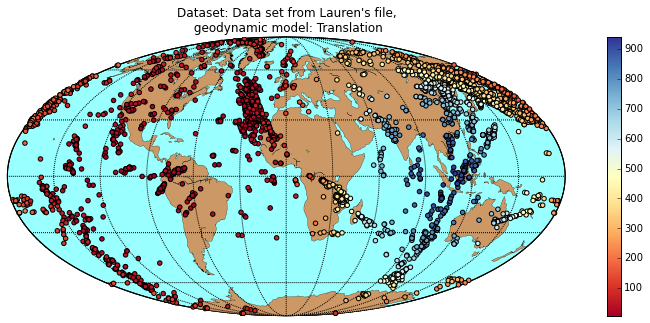

In [7]:
## map
m, fig = plot_data.setting_map() 
cm = plt.cm.get_cmap('RdYlBu')
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy2, zorder=10, cmap=cm)
plt.title("Dataset: {},\n geodynamic model: {}".format(data_set2.name, geodynModel.name))
plt.colorbar(sc)

[-180, 180, -90, 90]

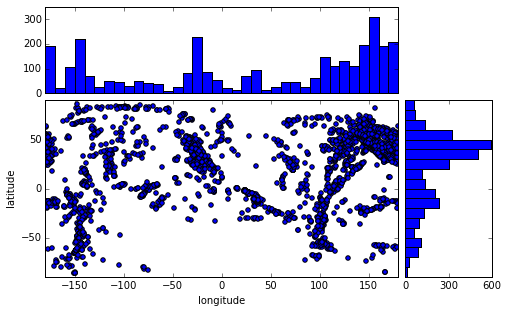

In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(p,t)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")


#to add histograms to see the actual repartition. Please see http://matplotlib.org/examples/axes_grid/scatter_hist.html
divider = make_axes_locatable(ax)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)
binwidth = 10.
limX = (int(180./binwidth) + 1)*binwidth
limY = (int(90./binwidth) + 1)*binwidth
binsX = np.arange(-limX, limX + binwidth, binwidth)
binsY = np.arange(-limY, limY + binwidth, binwidth)
axHistx.hist(p, bins=binsX)
axHisty.hist(t, bins=binsY, orientation='horizontal')
#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 100, 200, 300])

#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 300, 600])
ax.set_aspect('equal')
ax.axis([-180, 180, -90, 90])


### Real data set from Waszek paper, but average over raypath

In [ ]:
   ## real data set, average over raypath
data_set3 = data.SeismicFromFile("results.dat")
data_set3.method = "raypath"
geodynModel.evaluation= "0"
data_set3.NpointsRaypath = 20 
proxy3 = geodyn.evaluate_proxy(data_set3, geodynModel, verbose=False)
data_set3.proxy = proxy3 #evaluate_proxy(data_set, geodynModel)
data_set3.map_plot(geodynModel.name)
data_set3.phi_plot(geodynModel.name)
data_set3.distance_plot(geodynModel.name, positions.SeismoPoint(1., 0., -80.))

### Residual from Waszek data set

In [ ]:
data_set2.proxy = data_set2.real_residual()
data_set2.phi_plot(geodynModel.name)
data_set2.map_plot(geodynModel.name)
data_set2.distance_plot(geodynModel.name, positions.SeismoPoint(1., 0., -80.))